## Loading Datasets

In [1]:
import pandas as pd 
import numpy as np
import re                                                                           
import gender_guesser.detector as gender

In [2]:
real_users = pd.read_csv('datasets/realusers.csv')
fake_users = pd.read_csv('datasets/fakeusers.csv')

In [3]:
print(real_users.shape)
print(fake_users.shape)

(1481, 41)
(1337, 41)


In [4]:

X = pd.concat([real_users, fake_users])
X

,Unnamed: 0,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,...,verified,description,updated,dataset,age_in_days,ratio statuses_count/age,ratio Favorites/age,ratio Friends/Followers,length_of_bio,reputation
0,0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,2007-04-06 10:58:22+00:00,...,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13,5822,3.499,0.025,0.436,151,0.696372
1,1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,2007-04-30 15:08:42+00:00,...,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13,5797,0.540,0.002,0.753,104,0.570462
2,2,5682702,tacone,tacone_,4024,264,87,323,16,2007-05-01 11:53:40+00:00,...,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13,5797,0.694,0.056,0.330,22,0.752137
3,3,6067292,alesaura,alesstar,40586,640,622,1118,32,2007-05-15 16:55:16+00:00,...,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13,5782,7.019,0.193,0.972,36,0.507132
4,4,6015122,Angelo,PerDiletto,2016,62,64,13,0,2007-05-13 19:52:00+00:00,...,NaN,Je me souviens,2015-02-14 10:54:49,E13,5784,0.349,0.002,1.032,14,0.492063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1332,1391497074,Verda Marks,VerdaMarks1,1,0,17,0,0,2013-04-30 08:23:57+00:00,...,NaN,I have been in business onlin and offline for ...,2015-02-14 10:40:01,INT,3606,0.000,0.000,inf,158,0.000000
1333,1333,1391544607,Danial Campbell,DanialCampbell2,0,1,17,0,0,2013-04-30 08:34:49+00:00,...,NaN,NaN,2015-02-14 10:40:01,INT,3606,0.000,0.000,17.000,3,0.055556
1334,1334,1391622127,Maudie Meyer,MaudieMeyer1,2,0,15,0,0,2013-04-30 09:21:12+00:00,...,NaN,NaN,2015-02-14 10:40:01,INT,3606,0.001,0.000,inf,3,0.000000
1335,1335,1391832212,Harriett Harvey,HarriettHarvey9,2,0,16,0,0,2013-04-30 11:25:11+00:00,...,NaN,NaN,2015-02-14 10:40:01,INT,3606,0.001,0.000,inf,3,0.000000


In [5]:
X.columns

Index(['Unnamed: 0', 'id', 'name', 'screen_name', 'statuses_count',
       'followers_count', 'friends_count', 'favourites_count', 'listed_count',
       'created_at', 'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset', 'age_in_days',
       'ratio statuses_count/age', 'ratio Favorites/age',
       'ratio Friends/Followers', 'length_of_bio', 'reputation'],
      dtype='object')

In [6]:
print('Missing sum values:')
columns_to_check = ['Unnamed: 0', 'id', 'name', 'screen_name', 'statuses_count',
       'followers_count', 'friends_count', 'favourites_count', 'listed_count',
       'created_at', 'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated', 'dataset', 'age_in_days',
       'ratio statuses_count/age', 'ratio Favorites/age',
       'ratio Friends/Followers', 'length_of_bio', 'reputation']

columns_to_remove = ['Unnamed: 0']

for column in columns_to_check:
    try:
        missing_count = X[column].isnull().sum()
        print(f"{column}: {missing_count}")
        
        if missing_count > 2000:
            columns_to_remove.append(column)
            print(f"Removing {column} due to more than 2000 missing values.")
    except KeyError:
       
        print(f"{column}: Column not found in the DataFrame.")

Missing sum values:
Unnamed: 0: 0
id: 0
name: 0
screen_name: 0
statuses_count: 0
followers_count: 0
friends_count: 0
favourites_count: 0
listed_count: 0
created_at: 0
url: 2355
Removing url due to more than 2000 missing values.
lang: 0
time_zone: 1749
location: 547
default_profile: 1090
default_profile_image: 2810
Removing default_profile_image due to more than 2000 missing values.
geo_enabled: 2097
Removing geo_enabled due to more than 2000 missing values.
profile_image_url: 0
profile_banner_url: 1831
profile_use_background_image: 58
profile_background_image_url_https: 0
profile_text_color: 0
profile_image_url_https: 0
profile_sidebar_border_color: 0
profile_background_tile: 2329
Removing profile_background_tile due to more than 2000 missing values.
profile_sidebar_fill_color: 0
profile_background_image_url: 0
profile_background_color: 0
profile_link_color: 0
utc_offset: 1749
protected: 2818
Removing protected due to more than 2000 missing values.
verified: 2818
Removing verified due 

In [8]:

X = X.drop(columns=columns_to_remove, axis=1)

print("\nDataFrame after removing columns with more than 2000 null values:")
X


DataFrame after removing columns with more than 2000 null values:


,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,lang,...,utc_offset,description,updated,dataset,age_in_days,ratio statuses_count/age,ratio Favorites/age,ratio Friends/Followers,length_of_bio,reputation
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,2007-04-06 10:58:22+00:00,it,...,3600.0,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13,5822,3.499,0.025,0.436,151,0.696372
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,2007-04-30 15:08:42+00:00,en,...,3600.0,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13,5797,0.540,0.002,0.753,104,0.570462
2,5682702,tacone,tacone_,4024,264,87,323,16,2007-05-01 11:53:40+00:00,en,...,3600.0,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13,5797,0.694,0.056,0.330,22,0.752137
3,6067292,alesaura,alesstar,40586,640,622,1118,32,2007-05-15 16:55:16+00:00,en,...,3600.0,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13,5782,7.019,0.193,0.972,36,0.507132
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,2007-05-13 19:52:00+00:00,it,...,3600.0,Je me souviens,2015-02-14 10:54:49,E13,5784,0.349,0.002,1.032,14,0.492063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,1391497074,Verda Marks,VerdaMarks1,1,0,17,0,0,2013-04-30 08:23:57+00:00,en,...,NaN,I have been in business onlin and offline for ...,2015-02-14 10:40:01,INT,3606,0.000,0.000,inf,158,0.000000
1333,1391544607,Danial Campbell,DanialCampbell2,0,1,17,0,0,2013-04-30 08:34:49+00:00,en,...,NaN,NaN,2015-02-14 10:40:01,INT,3606,0.000,0.000,17.000,3,0.055556
1334,1391622127,Maudie Meyer,MaudieMeyer1,2,0,15,0,0,2013-04-30 09:21:12+00:00,en,...,NaN,NaN,2015-02-14 10:40:01,INT,3606,0.001,0.000,inf,3,0.000000
1335,1391832212,Harriett Harvey,HarriettHarvey9,2,0,16,0,0,2013-04-30 11:25:11+00:00,en,...,NaN,NaN,2015-02-14 10:40:01,INT,3606,0.001,0.000,inf,3,0.000000


In [7]:
y = len(fake_users)*[0]+len(real_users)*[1]

In [9]:

sex_predictor = gender.Detector(case_sensitive=False)

X['First Name'] = X['name'].str.split(' ').str.get(0)


def clean_name(name):
    cleaned_name = re.sub(r'[^\x00-\x7F]+', '', name)
    return cleaned_name

X['First Name'] = X['First Name'].apply(clean_name)

X['Predicted Sex'] = X['First Name'].apply(sex_predictor.get_gender)

sex_dict = {'female': -2, 'mostly_female': -1, 'unknown': 0, 'mostly_male': 1, 'male': 2}

X['Predicted Sex'] = X['Predicted Sex'].apply(lambda x: 'unknown' if x == 'andy' else x)

X['Sex Code'] = X['Predicted Sex'].map(sex_dict).astype(int)

In [11]:
X.sample(5)

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,lang,...,dataset,age_in_days,ratio statuses_count/age,ratio Favorites/age,ratio Friends/Followers,length_of_bio,reputation,First Name,Predicted Sex,Sex Code
141,55550359,Robbis Guidotti,robbisg,519,139,454,17,3,2009-07-10 12:43:27+00:00,en,...,E13,4996,0.104,0.003,3.266,120,0.234401,Robbis,unknown,0
431,209559462,mario damiano,artmario1,360,14,38,4,0,2010-10-29 12:33:37+00:00,it,...,E13,4520,0.080,0.001,2.714,23,0.269231,mario,male,2
1143,476800666,Luigi Panza,LuigiPanza1,877,99,715,15,0,2012-01-28 14:15:51+00:00,it,...,E13,4064,0.216,0.004,7.222,56,0.121622,Luigi,male,2
930,618205912,Judy Forbes,judyforbeswzy,24,12,307,0,0,2012-06-25 15:51:06+00:00,en,...,INT,3914,0.006,0.000,25.583,48,0.037618,Judy,female,-2
1437,252688673,three cheers for mcr,velvetpoison,5285,170,256,625,1,2011-02-15 18:15:17+00:00,it,...,E13,4410,1.198,0.142,1.506,135,0.399061,three,unknown,0


In [ ]:
corr_matrix_spearman = X.corr(method='spearman')
corr_matrix_kendall = X.corr(method='kendall')

In [10]:
lang_list = list(enumerate(np.unique(X['lang'])))
lang_dict = {name: i for i, name in lang_list}

lang_dict

{'de': 0, 'en': 1, 'es': 2, 'fr': 3, 'gl': 4, 'it': 5, 'nl': 6, 'tr': 7}

In [11]:

X['lang_code'] = X['lang'].map(lambda lang: lang_dict[lang]).astype(int)
feature_columns_to_use = ['Sex Code','statuses_count','followers_count','friends_count','favourites_count','listed_count','lang_code']
X = X[feature_columns_to_use]

In [12]:
x = X 
x

,Sex Code,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang_code
0,2,20370,5470,2385,145,52,5
1,-2,3131,506,381,9,40,1
2,0,4024,264,87,323,16,1
3,0,40586,640,622,1118,32,1
4,2,2016,62,64,13,0,5
...,...,...,...,...,...,...,...
1332,-2,1,0,17,0,0,1
1333,2,0,1,17,0,0,1
1334,-2,2,0,15,0,0,1
1335,-2,2,0,16,0,0,1


In [13]:
import joblib
import matplotlib.pyplot as plt
%matplotlib inline 


In [14]:
from sklearn import impute
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix, accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV, learning_curve
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [15]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a learning curve plot for a machine learning model.

    Parameters:
    - estimator: The machine learning model to evaluate.
    - title: The title of the plot.
    - X: The input features.
    - y: The target variable.
    - ylim: Tuple, optional, the y-axis limits.
    - cv: Cross-validation strategy. None by default.
    - n_jobs: Number of jobs to run in parallel for cross-validation.
    - train_sizes: Array of training set sizes.

    Returns:
    - Matplotlib plot object.
    """

    plt.figure()
    plt.title(title)

    if ylim is not None:
        plt.ylim(*ylim)

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
 
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)

    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [16]:
X.describe()

,Sex Code,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang_code
count,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000
mean,-0.194109,1672.198368,371.105039,395.363023,234.541164,2.818666,2.851313
std,1.688654,4884.669157,8022.631339,465.694322,1445.847248,23.480430,1.992950
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.000000,35.000000,17.000000,168.000000,0.000000,0.000000,1.000000
50%,0.000000,77.000000,26.000000,306.000000,0.000000,0.000000,1.000000
75%,2.000000,1087.750000,111.000000,519.000000,37.000000,1.000000,5.000000
max,2.000000,79876.000000,408372.000000,12773.000000,44349.000000,744.000000,7.000000


In [17]:
def train(X_train,y_train,X_test, y_test):
    filename = 'model.ckpt'
    clf=RandomForestClassifier(n_estimators=40,oob_score=True)
    clf.fit(X_train,y_train)
    joblib.dump(clf, filename)
    print("The best classifier is: ",clf)

    scores = model_selection.cross_val_score(clf, X_train,y_train, cv=5)
    print (scores)
    print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() / 2))
    title = 'Learning Curves (Random Forest)'
    plot_learning_curve(clf, title, X_train, y_train, cv=5)
    plt.show()

    y_pred = clf.predict(X_test)
    return y_test, y_pred

In [18]:
def train(X_train, y_train, X_test, y_test):
    filename = 'model.ckpt'
    param_grid = {
        'n_estimators': [20, 40, 60, 80, 100],
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    rf_clf = RandomForestClassifier(oob_score=True)
    scorer = make_scorer(accuracy_score)
    grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring=scorer, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_rf_model = grid_search.best_estimator_
    joblib.dump(best_rf_model, filename)
        
    print("Training Datasets using Random Forest Classifier")
    print("Best Hyperparameters:", grid_search.best_params_)
    y_pred = best_rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of the Best Model:", accuracy)
    print("Out-of-Bag Score:", best_rf_model.oob_score_)
    
    title = 'Learning Curves (Random Forest)'
    plot_learning_curve(best_rf_model, title, X_train, y_train, cv=5)
    plt.show()

    return y_test, y_pred

In [19]:
def train(X_train, y_train, X_test, y_test):
    filename = 'xg_model.ckpt'
    param_grid = {
        'n_estimators': [20, 40, 60],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.2, 0.3],
        'subsample': [0.8, 0.9, 1.0],
        'min_child_weight': [1, 3, 5]
    }

    xgb_clf = XGBClassifier()
    scorer = make_scorer(accuracy_score)
    grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring=scorer, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_xgb_model = grid_search.best_estimator_
    joblib.dump(best_xgb_model, filename)

    print("Training Datasets using XGBoost Classifier")
    print("Best Hyperparameters:", grid_search.best_params_)
    y_pred = best_xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of the Best Model:", accuracy)
    
    title = 'Learning Curves (XGBoost)'
    plot_learning_curve(best_xgb_model, title, X_train, y_train, cv=5)
    plt.show()

    return y_test, y_pred

In [20]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=44)

c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Datasets using XGBoost Classifier
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 40, 'subsample': 0.8}
Accuracy of the Best Model: 0.9414893617021277
[15:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\HAI\anaconda3\envs\harvestify\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


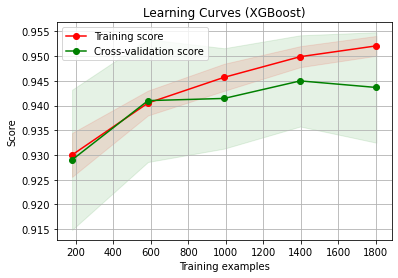

In [21]:

y_test, y_pred = train(X_train, y_train, X_test, y_test)

#### Plot Confusion Matrix

In [22]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine(Real)']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix[without Normalization]')
print(cm)

Confusion Matrix[without Normalization]
[[264   4]
 [ 29 267]]


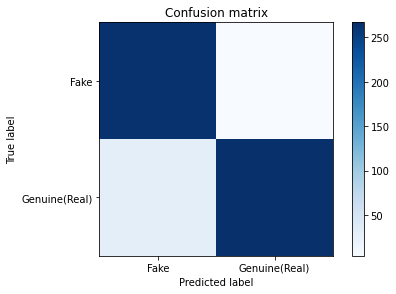

In [26]:
plot_confusion_matrix(cm)

In [27]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print('Confusion Matrix[with Normalization]')
print(cm_normalized)

Confusion Matrix[with Normalization]
[[0.98507463 0.01492537]
 [0.09797297 0.90202703]]


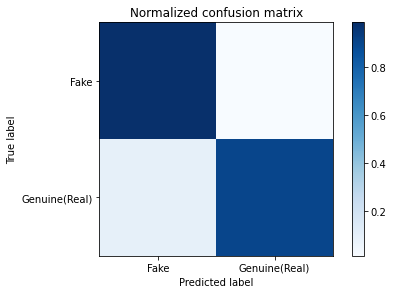

In [28]:
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

In [29]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    print("False Positive rate: ",false_positive_rate)
    print("True Positive rate: ",true_positive_rate)

    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

False Positive rate:  [0.         0.01492537 1.        ]
True Positive rate:  [0.         0.90202703 1.        ]


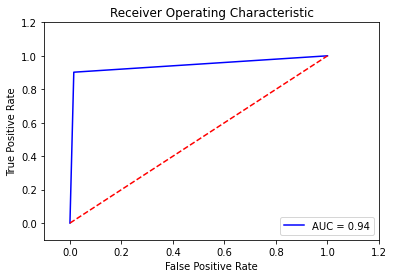

In [30]:
plot_roc_curve(y_test, y_pred)

In [32]:
!pip install tweepy


  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)


In [26]:
import joblib
import numpy as np

model = joblib.load('./model.ckpt')

sample_data = np.array([[-2, 3, 100, 23, 10, 0, 2]])

prediction = model.predict(sample_data)

print(prediction)

[1]


In [ ]:
import requests

def get_facebook_profile(access_token):
    url = f"https://graph.facebook.com/me?access_token={access_token}&fields=id,picture,about,friends.limit(0),posts.limit(100){'&since=0' if 'account_age_days' in ['account_age_days'] else ''}"

    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()

        profile_info = {}
        profile_info['profile_id'] = data.get('id')
        profile_info['profile_picture'] = data.get('picture', {}).get('data', {}).get('url')
        profile_info['friend_count'] = data.get('friends', {}).get('summary', {}).get('total_count', 0)
        posts = data.get('posts', {}).get('data', [])
        profile_info['post_count'] = len(posts)
        account_created = data.get('birthday')  
        if account_created:
            from datetime import datetime
            birthday = datetime.strptime(account_created, "%m/%d/%Y")
            account_age = (datetime.now() - birthday).days
            profile_info['account_age_days'] = account_age
        likes_per_post = []
        comments_per_post = []
        for post in posts:
            post_id = post.get('id')
            post_url = f"https://graph.facebook.com/{post_id}?fields=likes.summary(true),comments.summary(true)&access_token={access_token}"
            post_response = requests.get(post_url).json()
            likes_per_post.append(post_response.get('likes', {}).get('summary', {}).get('total_count', 0))
            comments_per_post.append(post_response.get('comments', {}).get('summary', {}).get('total_count', 0))

        profile_info['likes_per_post'] = sum(likes_per_post) / len(likes_per_post) if likes_per_post else 0
        profile_info['comments_per_post'] = sum(comments_per_post) / len(comments_per_post) if comments_per_post else 0

        shared_links = sum([1 for post in posts if 'link' in post])
        profile_info['shared_links'] = shared_links

        profile_info['about_section'] = data.get('about', 'Not Available')

        profile_info['suspicious_activity'] = "Not Implemented"  

        return profile_info
    
    else:
        print(f"Error fetching data: {response.status_code}")
        return None


profile_info = get_facebook_profile(access_token)
if profile_info:
    print("Profile Info:", profile_info)


Error fetching data: 429 Too Many Requests
Too Many Requests
Failed to fetch followers count.
